# Shoe-type to Personality Model

## Section 1 - Introduction

Shoes have been worn for millenia for different reasons. From sandals to support armies, eventually to full shoes, boots, and various other models used in fashion or practicality, shoes have supported mankind for a variety of different reasons.

Sports have seen a major uptake in diverging models of shoes. These shoes can also be attributed to the level of risk that people are willing to take as well as points of their personality, from climbing outdoors to running on the sidewalk, the shoes of athletes show how bold they can be.

In this analysis, we will assess the following categories to determine how bold the wearer of the shoe is: Bold - Trail Runners, Boring - Runners, Energetic - Basketball Shoes, Strategic - Soccer Shoes, and Insane - Climbing Shoes.

As a point of clarity, this assessment is purely subjective.

## Section 2 - Data Preprocessing

Importing of libraries

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Splitting training and testing datasets

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)

training_set = train_datagen.flow_from_directory('./ShoesIdentifier/Images/Train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset='training')

validation_set = train_datagen.flow_from_directory('./ShoesIdentifier/Images/Train',
                                                   target_size=(64, 64),
                                                   batch_size=32,
                                                   class_mode='categorical',
                                                   subset='validation')

Found 160 images belonging to 5 classes.
Found 40 images belonging to 5 classes.


Preprocessing the test set

In [12]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('./ShoesIdentifier/Images/Test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 50 images belonging to 5 classes.


## Section 3 - Building the CNN model

Creating the layers, max pooling, and flattening the model.

In [19]:
# Initialize the model
Model = tf.keras.models.Sequential()

# First convolution layer
Model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu', input_shape=[64, 64, 3]))

# Max Pooling first layer
Model.add(tf.keras.layers.MaxPool2D(pool_size=4, strides=2))

# Second convulution layer
Model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='relu'))

# Max Pooling second layer
Model.add(tf.keras.layers.MaxPool2D(pool_size=4, strides=2))

# Flattening
Model.add(tf.keras.layers.Flatten())

# Output Layer
Model.add(tf.keras.layers.Dense(units=5, activation='softmax'))

C:\Users\nikol\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compiling the CNN

In [22]:
Model.compile(loss='categorical_crossentropy', optimizer='nadam',metrics=['accuracy'])

## Section 4 - Implementing the CNN Model

Training the CNN

In [26]:
history=Model.fit(x = training_set, validation_data = validation_set, epochs = 40)

Epoch 1/40


C:\Users\nikol\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 459ms/step - accuracy: 0.1917 - loss: 1.6316 - val_accuracy: 0.3250 - val_loss: 1.5742
Epoch 2/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.2552 - loss: 1.5858 - val_accuracy: 0.3250 - val_loss: 1.5758
Epoch 3/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - accuracy: 0.3044 - loss: 1.5620 - val_accuracy: 0.4000 - val_loss: 1.5359
Epoch 4/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.4720 - loss: 1.5083 - val_accuracy: 0.3250 - val_loss: 1.5266
Epoch 5/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.4747 - loss: 1.4356 - val_accuracy: 0.1750 - val_loss: 1.5129
Epoch 6/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.3943 - loss: 1.3726 - val_accuracy: 0.4750 - val_loss: 1.3580
Epoch 7/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.5141 - loss: 1.3109 - val_accuracy: 0.4000 - val_loss: 1.3698
Epoch 8/40
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.6115 - loss: 1.1777 - val_accuracy: 0.4500 - val_loss: 1.2732
Epoch 9/40

Making predictions with the test set

In [35]:
import numpy as np
import os
from keras.preprocessing import image

path = r'./ShoesIdentifier/Unknown'
for img in os.listdir(path):
    # Load and preprocess the image
    test_image = image.load_img(path + "/" + img, target_size=(64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)

    # Make the prediction
    predict = Model.predict(test_image)
    
    # Use np.argmax to find the index with the highest probability
    predicted_class = np.argmax(predict[0])

    # Map the index to the class label
    if predicted_class == 0:
        prediction = 'Bold'
    elif predicted_class == 1:
        prediction = 'Boring'
    elif predicted_class == 2:
        prediction = 'Energetic'
    elif predicted_class == 3:
        prediction = 'Insane'
    elif predicted_class == 4:
        prediction = 'Strategic'

    print(img + " = " + prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
7415186.14.jpg = Boring
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
7415186.3.jpg = Bold
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
7415365.158.jpg = Bold
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
7887055.318338.jpg = Boring
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
7887321.324462.jpg = Bold
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
7887494.29891.jpg = Bold
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
7887494.41100.jpg = Bold
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
7887497.156516.jpg = Bold
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
7887503.18059.jpg = Bold
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
7887503.19296.jpg = Bold
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
7887503.347814.jpg = Bold
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
7887973.347837.jpg = Boring
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
7887973.347838.jpg = Bold
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
adidas-men-s-f50-league-turf-extra-narrow-indoor-soccer-shoes-.jpg = Strategic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
andrea_boldrini_apache_

Based on the results, it appears that the model has some trouble with predicting some basketball shoes, which reflects the reality of some shoes being quite ambiguous in their form.

## Section 5 - Model Accuracy and Results

Plotting the model accuracy

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


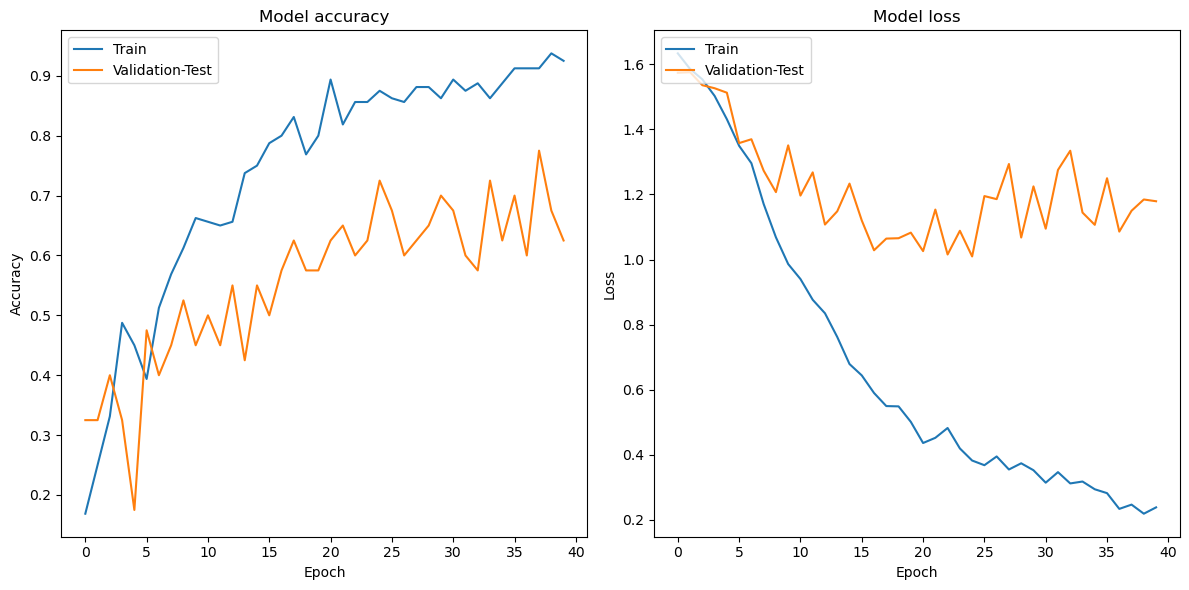

In [37]:
print(history.history.keys())
import matplotlib.pyplot as plt

# Plotting learning curves
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy']) 
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation-Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation-Test'], loc='upper left')

plt.tight_layout()
plt.show()

From analyzing the shoes, it appears that we would need more data with the accuracy approaching 60-90%, and the losses ranging even further between .2 to 1.2. 

Testing the accurracy of the model

In [40]:
test_accuracy = Model.evaluate(test_set)
print(f'Test Accuracy: {test_accuracy[1]}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8279 - loss: 0.4732 
Test Accuracy: 0.8199999928474426


C:\Users\nikol\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Based on the results of the accuracy, we can find that CNN has some limitations due to the similarities of some of the shoes. Still though, 82% accuracy is fairly high and is fairly reliable in determining the shoes in question.